# Esports Earnings Analysis


[<img src="https://juked.gg/wp-content/uploads/2024/01/valorant-esports.jpg"  width="500"/>](image.png)


Lets take a look at the earnings from esports

In [2]:
!ls -GFlash --color ../input/esports-earnings-for-players-teams-by-game/


total 160K
   0 drwxr-xr-x 2 nobody    0 Sep 10 07:29 ./
4.0K drwxr-xr-x 4 root   4.0K Sep 10 07:29 ../
 16K -rw-r--r-- 1 nobody  13K Sep 10 07:29 country-and-continent-codes-list.csv
 76K -rw-r--r-- 1 nobody  75K Sep 10 07:29 highest_earning_players.csv
 64K -rw-r--r-- 1 nobody  61K Sep 10 07:29 highest_earning_teams.csv


In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from itertools import cycle 
import plotly.express as px
from glob import glob # this will let us grab all the files

#Iterate the color palette
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(color_pal)


warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

In [4]:
#Read the dataset #1

files = glob('/kaggle/input/esports-earnings-for-players-teams-by-game/*')
teams = pd.read_csv(files[0])
players = pd.read_csv(files[1])
codes = pd.read_csv(files[2])


In [5]:
players['Game'].value_counts()


Game
Counter-Strike: Global Offensive    100
Dota 2                              100
League of Legends                   100
Fortnite                            100
Overwatch                           100
Starcraft II                        100
Heroes of the Storm                 100
PUBG                                100
Arena of Valor                      100
Hearthstone                         100
Name: count, dtype: int64

## Dataset 2

## Esports Earnings 1998 - 2023


In [21]:
files = glob('../input/esports-earnings/*')
hist = pd.read_csv(files[0], encoding = 'ISO -8859-1', parse_dates = ['Date'])
general = pd.read_csv(files[1], encoding = 'ISO -8859-1' )

In [23]:
hist['Date']


0      1998-01-01
1      1998-01-01
2      1998-05-01
3      1998-05-01
4      1998-05-01
          ...    
9239   2023-10-01
9240   2023-10-01
9241   2023-10-01
9242   2023-10-01
9243   2023-10-01
Name: Date, Length: 9244, dtype: datetime64[ns]

In [8]:
general

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613
2,Age of Empires III,2005,Strategy,115843.65,41800.00,0.360831,166,163
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327
4,Age of Empires Online,2011,Strategy,9806.56,775.00,0.079029,44,50
...,...,...,...,...,...,...,...,...
645,Guitar Hero 5,2009,Music / Rhythm Game,10500.00,10500.00,1.000000,3,1
646,Guitar Hero III: Legends of Rock,2007,Music / Rhythm Game,19000.00,19000.00,1.000000,8,2
647,Guitar Hero: World Tour,2008,Music / Rhythm Game,0.00,0.00,NaN,0,0
648,Just Dance 2014,2013,Music / Rhythm Game,0.00,0.00,NaN,3,1


In [14]:
hist['Game'].value_counts()

Game
Super Smash Bros. Melee    213
Age of Empires II          204
WarCraft III               203
StarCraft: Brood War       179
StarCraft II               165
                          ... 
Mighty Fight Federation      1
Red Earth                    1
Toribash                     1
Tough Love Arena             1
Smash Remix                  1
Name: count, Length: 597, dtype: int64

In [55]:
#Total 10 unique games
top_10_games = hist['Game'].value_counts().head(10).index 

top_10_games

Index(['Super Smash Bros. Melee', 'Age of Empires II', 'WarCraft III',
       'StarCraft: Brood War', 'StarCraft II', 'League of Legends', 'Dota 2',
       'Counter-Strike', 'Counter-Strike: Global Offensive', 'Chess.com'],
      dtype='object', name='Game')

In [59]:
pal = sns.color_palette()

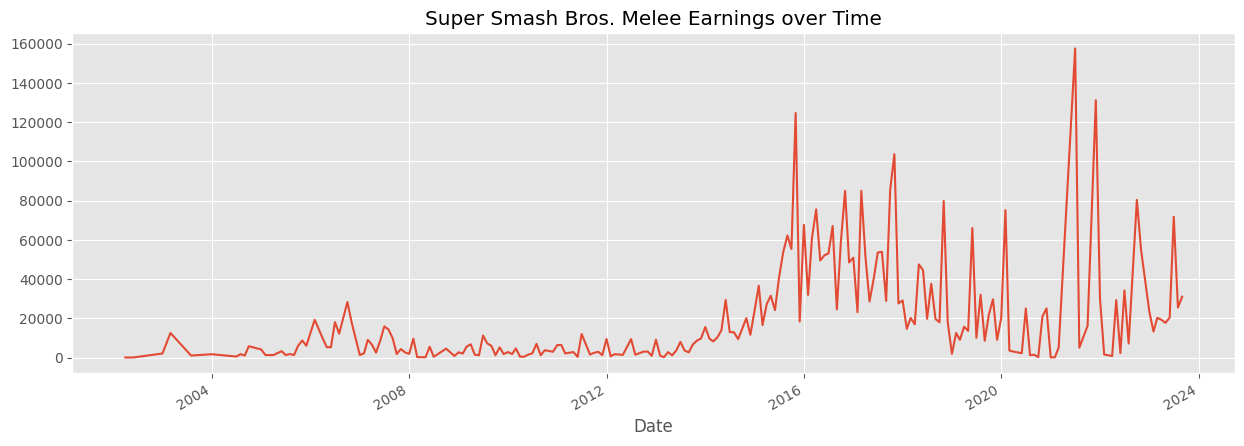

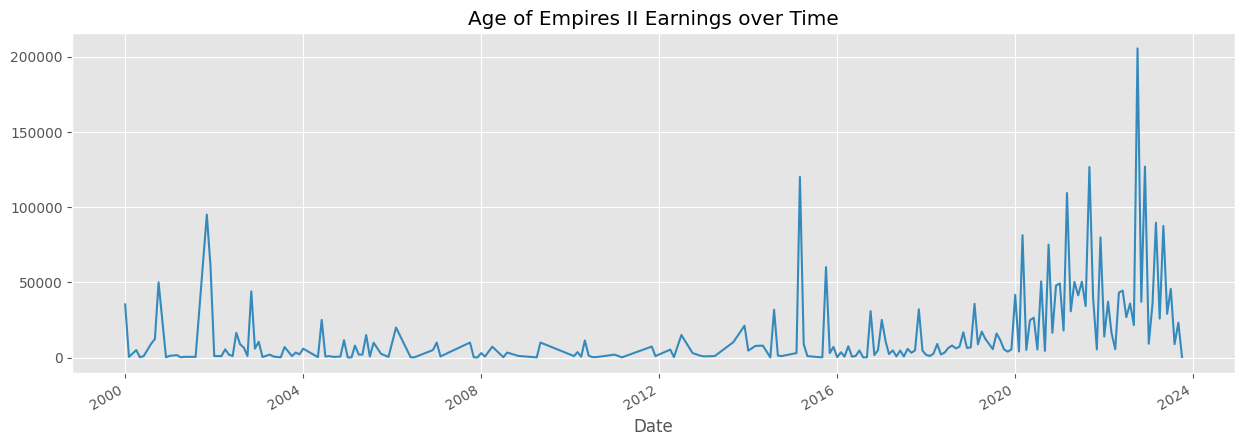

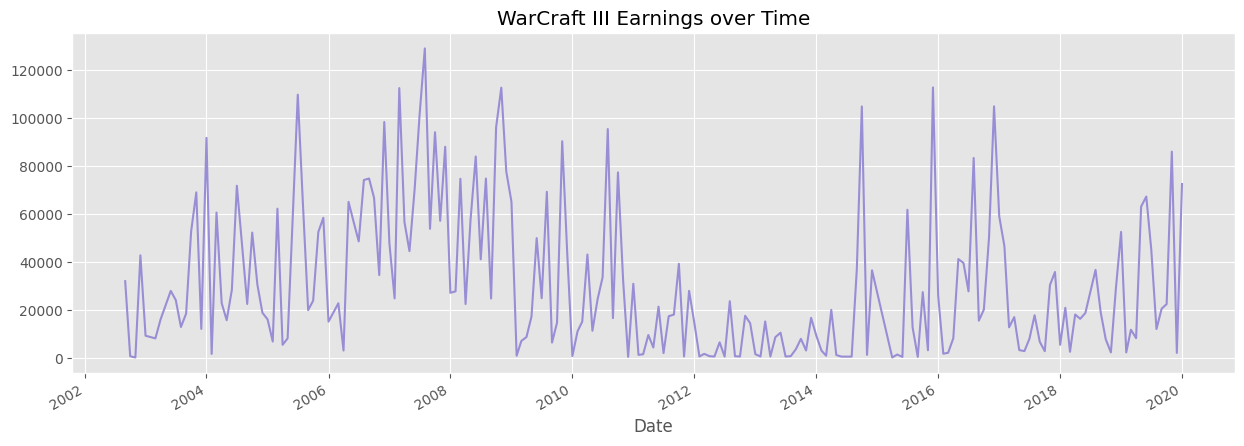

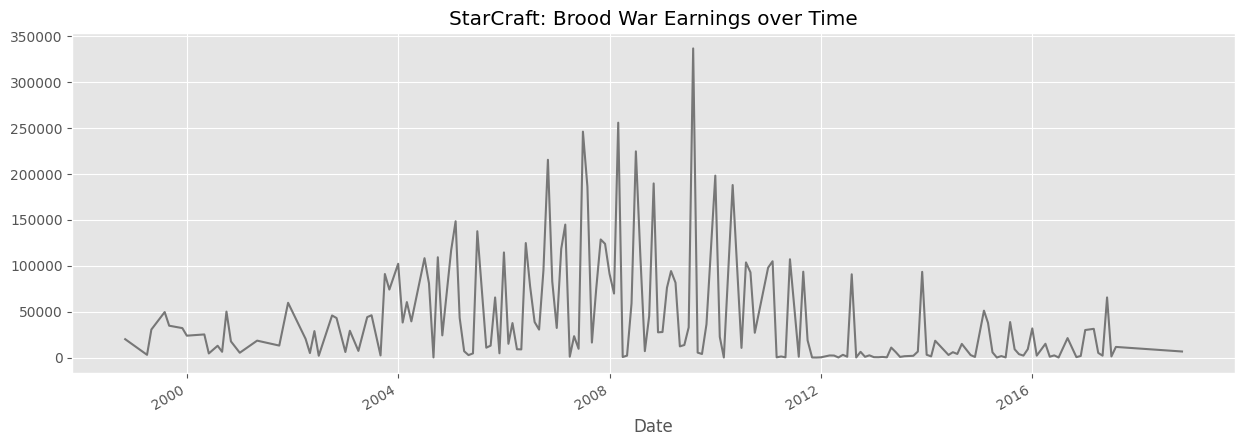

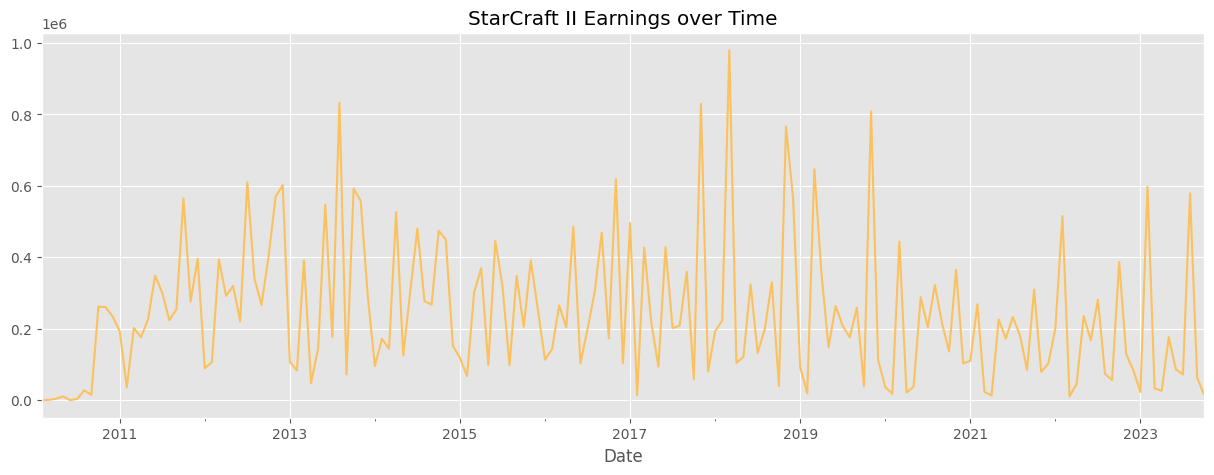

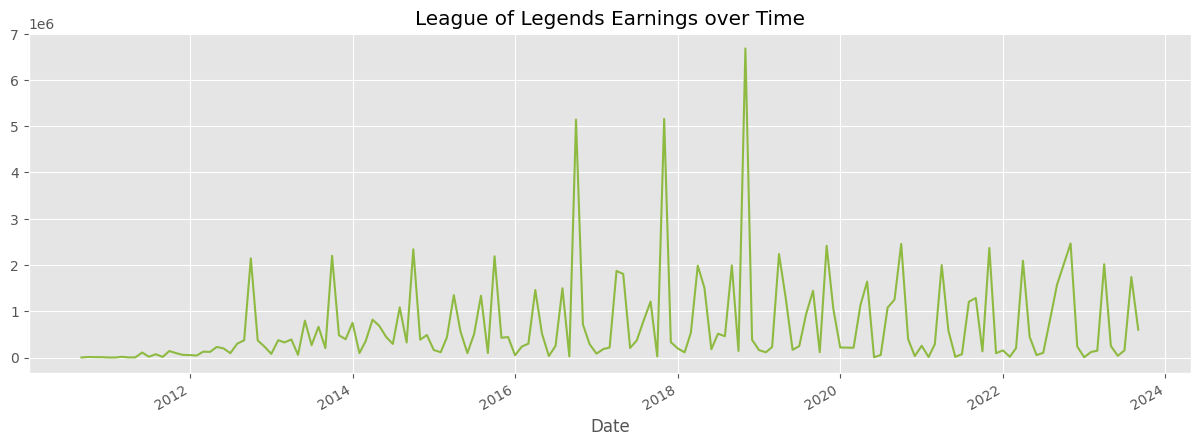

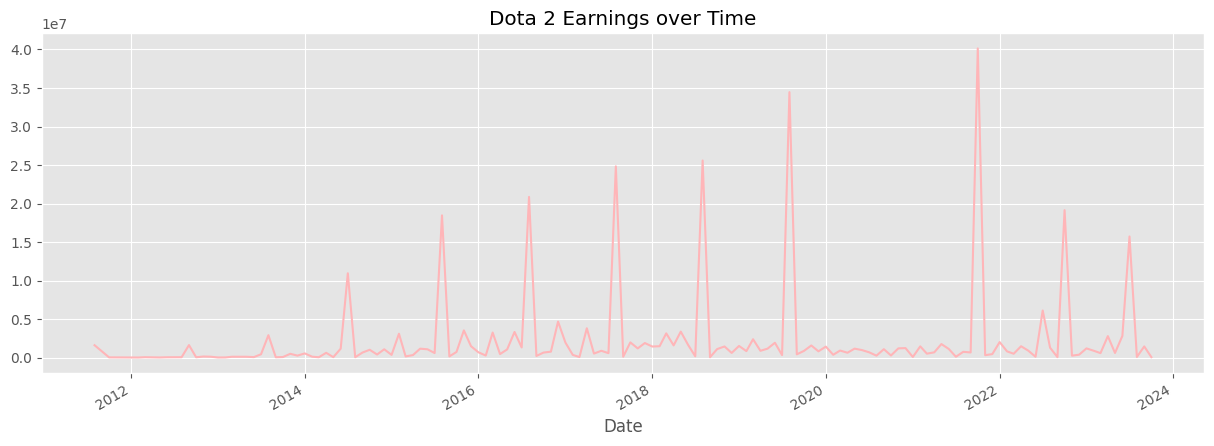

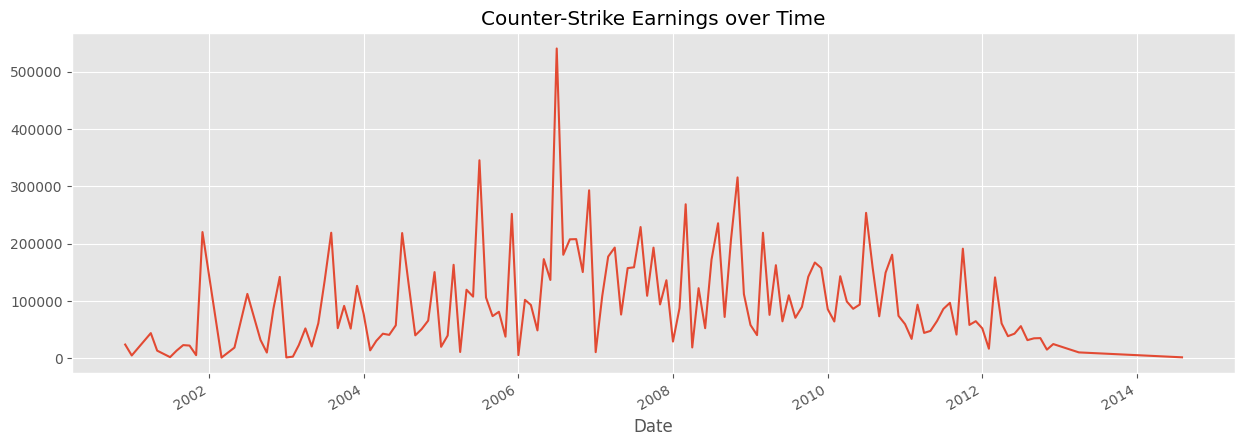

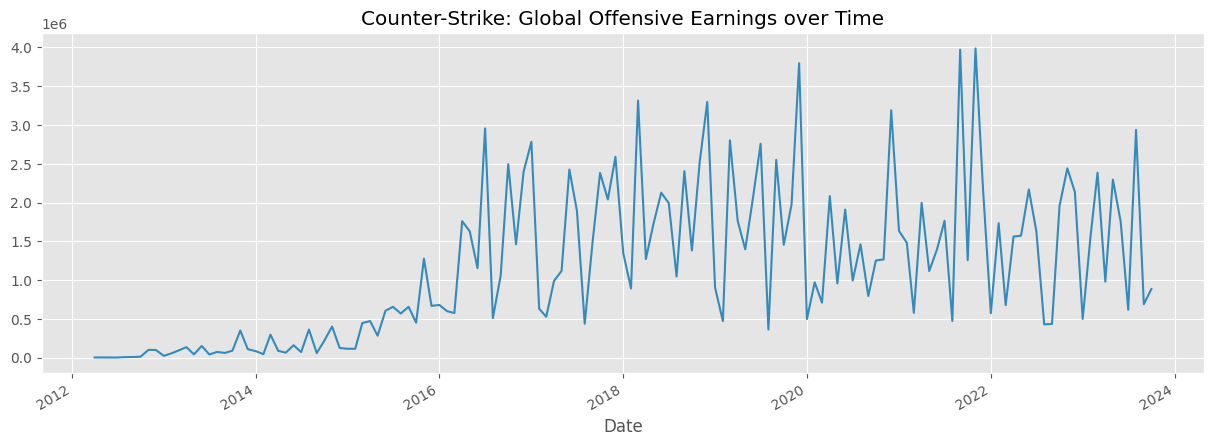

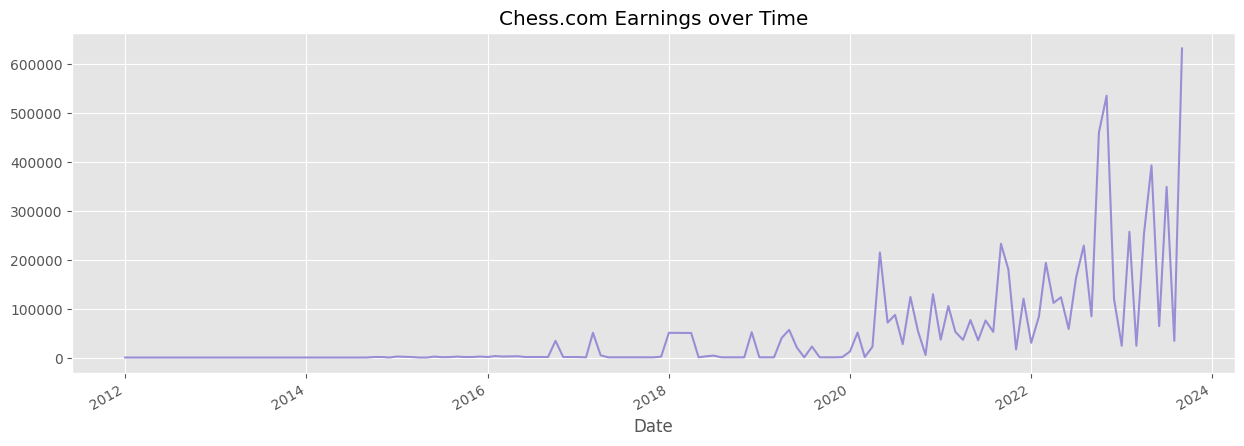

In [65]:

for i, game in enumerate(top_10_games):
    hist.loc[hist['Game'] == game]\
        .sort_values('Date')\
        .set_index('Date')['Earnings']\
        .plot(figsize = (15,5), 
              title = f'{game} Earnings over Time',
              color = next(color_cycle))
    plt.show()
        


# Top Game/Year